In [2]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Lecture 1: Introduction
**A few useful things to know about machine learning**

Joaquin Vanschoren

### Why Machine Learning?
- Search engines (e.g. Google)
- Recommender systems (e.g. Netflix)
- Automatic translation (e.g. Google Translate)
- Speech understanding (e.g. Siri, Alexa)
- Game playing (e.g. AlphaGo)
- Self-driving cars
- Personalized medicine
- Progress in all sciences: Genetics, astronomy, chemistry, neurology, physics,...

### What is Machine Learning?
- Learn to perform a task, based on experience (examples) $X$, minimizing error $\mathcal{E}$
    - E.g. recognizing a person in an image as accurately as possible
- Often, we want to learn a function (model) $f$ with some model parameters $\theta$ that produces the right output $y$

$$f_{\theta}(X) = y$$
$$\underset{\theta}{\operatorname{argmin}} \mathcal{E}(f_{\theta}(X))$$

- Usually part of a _much_ larger system that provides the data $X$ in the right form
    - Data needs to be collected, cleaned, normalized, checked for data biases,...

### Inductive bias

- In practice, we have to put assumptions into the model: _inductive bias_ $b$
    - What should the model look like?
        - Mimick human brain: Neural Networks
        - Logical combination of inputs: Decision trees, Linear models
        - Remember similar examples: Nearest Neighbors, SVMs
        - Probability distribution: Bayesian models
    - User-defined settings (hyperparameters)
        - E.g. depth of tree, network architecture
    - Assuptions about the data distribution, e.g. $X \sim N(\mu,\sigma)$
- We can _transfer_ knowledge from previous tasks: $f_1, f_2, f_3, ... \Longrightarrow f_{new}$
    - Choose the right model, hyperparameters
    - Reuse previously learned values for model parameters $\theta$
- In short:

$$\underset{\theta,b}{\operatorname{argmin}} \mathcal{E}(f_{\theta, b}(X))$$

### Machine learning vs Statistics
* See Breiman (2001): Statistical modelling: The two cultures
* Both aim to make predictions of natural phenomena:
<img src="../images/00_stat1.png" alt="ml" style="width: 200px;"/>
* Statistics:
    - Help humans understand the world
    - Assume data is generated according to understandable model
<img src="../images/00_stat2.png" alt="ml" style="width: 200px;"/>
* Machine learning:
    - Automate a task entirely (partially _replace_ the human)
    - Assume that data generation process is unknown
    - Engineering-oriented, less (too little?) mathematical theory
<img src="../images/00_stat3.png" alt="ml" style="width: 200px;"/>

# Types of machine learning
- __Supervised Learning__: learn a _model_ $f$ from _labeled data_ $(X,y)$ (ground truth)
    - Given a new input _X_, predict the right output _y_
    - Given examples of stars and galaxies, identify new objects in the sky
- __Unsupervised Learning__: explore the structure of the data (X) to extract meaningful information
    - Given inputs _X_, find which ones are special, similar, anomalous, ...
- __Semi-Supervised Learning__: learn a model from (few) labeled and (many) unlabeled examples
    - Unlabeled examples add information about which new examples are likely to occur
- __Reinforcement Learning__: develop an agent that improves its performance based on interactions with the environment 

Note: Practical ML systems can combine many types in one system.

## Supervised Machine Learning

- Learn a model from labeled training data, then make predictions
- Supervised: we know the correct/desired outcome (label)
- Subtypes: _classification_ (predict a class) and _regression_ (predict a numeric value)
- Most supervised algorithms that we will see can do both

<img src="../images/01_supervised.png" alt="ml" style="width: 60%;"/>

### Classification

- Predict a _class label_ (category), discrete and unordered
    - Can be _binary_ (e.g. spam/not spam) or _multi-class_ (e.g. letter recognition)
    - Many classifiers can return a _confidence_ per class
- The predictions of the model yield a _decision boundary_ separating the classes

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# create a synthetic dataset
X1, y1 = make_moons(n_samples=70, noise=0.2, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X1, y1)
svm = SVC(kernel='rbf', gamma=2, probability=True).fit(X1, y1)
knn = KNeighborsClassifier(n_neighbors=3).fit(X1, y1)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))    
    mglearn.tools.plot_2d_separator(
        classifier, X1, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X1, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X1[:, 0], X1[:, 1], y1,
                                 markers='o', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=15)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(C=1.0, class_weight=None,…

#### Example: Flower classification
Classify types of Iris flowers (setosa, versicolor, or virginica). How would you do it?

<img src="../images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


#### Representation: input features and labels
- We could take pictures and use them (pixel values) as inputs (-> Deep Learning)
- We can manually define a number of input features (variables), e.g. length and width of leaves
- Every `example' is a point in a (possibly high-dimensional) space
    
<img src="../images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="../images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

### Regression
- Predict a continuous value, e.g. temperature
    - Target variable is numeric
    - Some algorithms can return a _confidence interval_
- Find the relationship between predictors and the target.
    - E.g. relationship between hours studied and final grade

In [4]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X2, y2 = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X2, y2)
ridge = BayesianRidge().fit(X2, y2)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X2, y2)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(8, 8))
    plt.plot(X2, y2, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(copy_X=True, fit_intercept=T…

## Unsupervised Machine Learning

- Unlabeled data, or data with unknown structure
- Explore the structure of the data to extract information
- Many types, we'll just discuss two.

### Clustering

- Organize information into meaningful subgroups (clusters)
- Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
- Example: distinguish different types of customers

In [82]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nr_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=nr_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("KMeans Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

### Dimensionality reduction

- Data can be very high-dimensional and difficult to understand, learn from, store,...
- Dimensionality reduction can compress the data into fewer dimensions, while retaining most of the information
- Contrary to feature selection, the new features lose their (original) meaning
- The new representation can be a lot easier to model (and visualize)

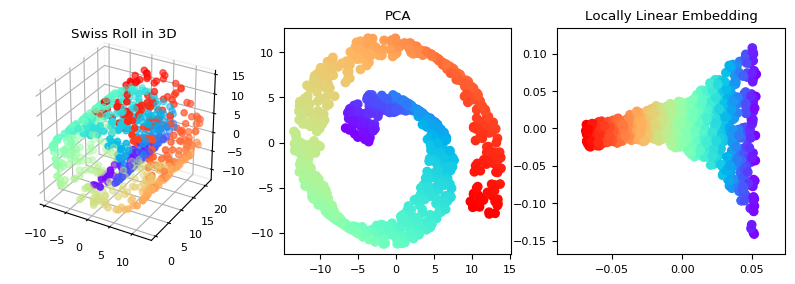

In [6]:
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

## Reinforcement learning

- Develop an agent that improves its performance based on interactions with the environment
    - Example: games like Chess, Go,...
- Search a (large) space of actions and states
- _Reward function_ defines how well a (series of) actions works
- Learn a series of actions (policy) that maximizes reward through exploration

<img src="../images/01_rl2.png" alt="ml" style="width: 60%;"/>


# Learning = Representation + evaluation + optimization
All machine learning algorithms consist of 3 components:
- **Representation**: A model $f_{\theta}$ must be represented in a formal language that the computer can handle
    - Defines the 'concepts' it can learn, the _hypothesis space_
    - E.g. a decision tree, neural network, set of annotated data points
- **Evaluation**: An _internal_ way to choose one hypothesis over the other
    - Objective function, scoring function, loss function $\mathcal{L}(f_{\theta})$
    - E.g. Difference between correct output and predictions
- **Optimization**: An _efficient_ way to search the hypothesis space
    - Start from simple hypothesis, extend (relax) if it doesn't fit the data
    - Start with initial set of model parameters, gradually refine them
    - Many methods, differing in speed of learning, number of optima,...
    
A powerful/flexible model is only useful if it can also be optimized efficiently

### Example: neural networks
* Representation: (layered) neural network
    * Each connection has a _weight_ $\theta_i$ (a.k.a. model parameters)
    * Each node receives weighted inputs, emits new value
    * Model $f$ returns the output of the last layer    
* The architecture, number/type of neurons, etc. are fixed
    * We call these _hyperparameters_ (set by user, fixed during training)

<img src="../images/08_nn_basic_arch.png" alt="ml" style="float: left; width: 40%;"/>
    


### Example: neural networks
* Representation: For illustration, consider 2 model parameters ($\theta_0,\theta_1$)
* Evaluation: A _loss function_ $\mathcal{L}(f_{\theta})$ computes how good the predictions are
    * _Estimated_ on a set of training data with the 'correct' predictions
    * We can't see the full surface, only evaluate specific sets of parameters
* Optimization: Find the optimal set of parameters
    * Usually a type of _search_ in the hypothesis space
    * Given a few initial evaluations, predict which parameters may be better
    * E.g. Gradient descent: $\theta_i^{new} = \theta_i + \frac{\mathcal{L}(f_{\theta})}{\partial \theta_i} $

    

<img src="../images/00_ml3.png" alt="ml" style="float: left; width: 90%;"/>

## Overfitting and Underfitting
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on new data
* Overfitting: building a model that is _too complex for the amount of data_ you have
    * You model peculiarities in your training data (noise, biases,...)
    * Solve by making model simpler (regularization), or getting more data
    * **Most algorithms have hyperparameters that allow regularization**
* Underfitting: building a model that is _too simple given the complexity of the data_
    * Use a more complex model
* There are techniques for detecting overfitting (e.g. bias-variance analysis). More about that later
* You can build _ensembles_ of many models to overcome both underfitting and overfitting 

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
* Example: regression using polynomial functions

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.1
X3_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

@interact
def plot_poly(degrees = (1, 16, 1)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))    
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X3[:, np.newaxis], y3)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X3[:, np.newaxis], y3,
                             scoring="neg_mean_squared_error", cv=10)

    ax1.plot(X3_test, pipeline.predict(X3_test[:, np.newaxis]), label="Model")
    ax1.plot(X3_test, true_fun(X3_test), label="True function")
    ax1.scatter(X3, y3, edgecolor='b', s=20, label="Samples")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim((0, 1))
    ax1.set_ylim((-2, 2))
    ax1.legend(loc="best")
    ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees, -scores.mean(), scores.std()))
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    # Plot scores
    ax2.scatter(scores_x, scores_y, edgecolor='b', s=20)
    order = np.argsort(scores_x)
    ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
    ax2.set_xlim((0, 16))
    ax2.set_ylim((10**-2, 10**11))
    ax2.set_xlabel("degree")
    ax2.set_ylabel("error")
    ax2.set_yscale("log")
    
    fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

## Model selection
- Next to the (internal) loss function, we need an (external) evaluation function
    - Feedback signal: are we actually learning the right thing? 
        - Are we under/overfitting?
    - Carefully choose to fit the application.
    - Needed to select between models (and hyperparameter settings)

<img src="../images/xkcd.jpg" alt="ml" style="width: 30%;"/>
&copy; XKCD

- Data needs to be split into _training_ and _test_ sets
    - Optimize model parameters on the training set, evaluate on independent test set
- Avoid _data leakage_:
    - Never optimize hyperparameter settings on the test data
    - Never choose preprocessing techniques based on the test data
- To optimize hyperparameters and preprocessing as well, set aside part of training set as a _validation_ set
    - Keep test set hidden during _all_ training

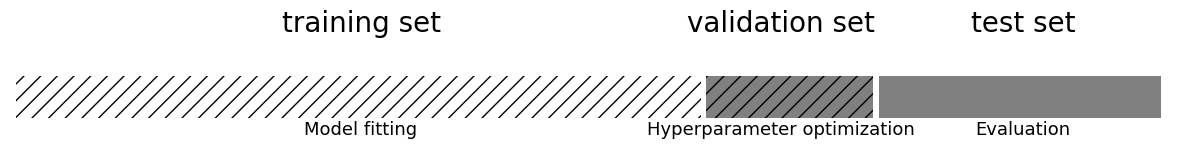

In [8]:
import mglearn
mglearn.plots.plot_threefold_split()

Overview

<img src="../images/00_hyperparams.png" alt="ml" style="width: 50%;"/>

## Only generalization counts!
* Never evaluate your final models on the training data, except for:
    * Tracking whether the optimizer converges (learning curves)
    * Diagnosing under/overfitting:
        * Low training and test score: underfitting
        * High training score, low test score: overfitting
* Always keep a completely independent test set 
* On small datasets, use multiple train-test splits to avoid sampling bias
    * You could sample an 'easy' test set by accident
    * E.g. Use cross-validation (see later)

## Better data representations, better models
- Algorithm needs to correctly transform the inputs to the right outputs
- A lot depends on how we present the data to the algorithm
    - Transform data to better representation (a.k.a. _encoding_ or _embedding_)
    - Can be done end-to-end (e.g. deep learning) or by first 'preprocessing' the data (e.g. feature selection/generation)
<img src="../images/00_representation.png" alt="ml" style="width: 800px;"/>

## Feature engineering
* Most machine learning techniques require humans to build a good representation of the data  
* Especially when data is naturally structured (e.g. table with meaningful columns)
* Feature engineering is often still necessary to get the best results
    * Feature selection, dimensionality reduction, scaling, ...
    * *Applied machine learning is basically feature engineering (Andrew Ng)*
* Nothing beats domain knowledge (when available) to get a good representation
    * E.g. Iris data: leaf length/width separate the classes well
    
<img src="../images/01_iris3d.png" alt="ml" style="width: 35%;"/>

## Learning data transformations end-to-end
* For unstructured data (e.g. images, text), it's hard to extract good features
* Deep learning: learn your own representation (embedding) of the data 
    * Through multiple layers of representation (e.g. layers of neurons)
    * Each layer transforms the data a bit, based on what reduces the error
    
<img src="../images/00_layers.png" alt="ml" style="width: 60%"/>

#### Example: digit classification
- Input pixels go in, each layer transforms them to an increasingly informative representation for the given task
- Often less intuitive for humans
<img src="../images/00_layers2.png" alt="ml" style="width: 60%"/>

## Curse of dimensionality
* Just adding lots of features and letting the model figure it out doesn't work
* Our assumptions (inductive biases) often fail in high dimensions: 
    - Randomly sample points in an n-dimensional space (e.g. a unit hypercube)
    - Almost all points become outliers at the edge of the space
    - Distances between any two points will become almost identical

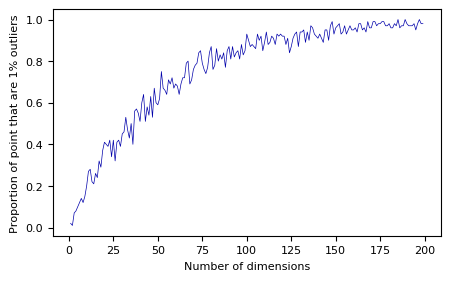

In [9]:
# Code originally by Peter Norvig 
def sample(d=2, N=100):
    return [[np.random.uniform(0., 1.) for i in range(d)] for _ in range(N)]

def corner_count(points):
    return np.mean([any([(d < .01 or d > .99) for d in p]) for p in points])

def go(Ds=range(1,200)):
    plt.plot(Ds, [corner_count(sample(d)) for d in Ds])
    plt.xlabel("Number of dimensions")
    plt.ylabel("Proportion of point that are 1% outliers")
    
go()

#### Practical consequences
* For every dimension (feature) you add, you need exponentially more data to avoid sparseness
* Affects any algorithm that is based on distances (e.g. kNN, SVM, kernel-based methods, tree-based methods,...)
* Blessing of non-uniformity: on many applications, the data lives in a very small subspace
    * You can drastically improve performance by selecting features or using lower-dimensional data representations

### "More data can beat a cleverer algorithm"
(but you need both)

* More data reduces the chance of overfitting
* Less sparse data reduces the curse of dimensionality
* _Non-parametric_ models: number of model parameters grows with amount of data
    - Tree-based techniques, k-Nearest neighbors, SVM,...
    - They can learn any model given sufficient data (but can get stuck in local minima)
* _Parametric_ (fixed size) models: fixed number of model parameters
    - Linear models, Neural networks,...
    - Can be given a huge number of parameters to benefit from more data 
    - Deep learning models can have millions of weights, learn almost any function.
* The bottleneck is moving from data to compute/scalability

# Building machine learning systems
A typical machine learning system has multiple components, which we will cover in upcoming lectures:
    
- Preprocessing: Raw data is rarely ideal for learning
    - Feature scaling: bring values in same range
    - Encoding: make categorical features numeric
    - Discretization: make numeric features categorical
    - Label imbalance correction (e.g. downsampling)
    - Feature selection: remove uninteresting/correlated features
    - Dimensionality reduction can also make data easier to learn
    - Using pre-learned embeddings (e.g. word-to-vector, image-to-vector)
    

- Learning and evaluation
    - Every algorithm has its own biases
    - No single algorithm is always best
    - _Model selection_ compares and selects the best models
        - Different algorithms, different hyperparameter settings
    - Split data in training, validation, and test sets
    
- Prediction
    - Final optimized model can be used for prediction
    - Expected performance is performance measured on _independent_ test set

- Together they form a _workflow_ of _pipeline_
- There exist machine learning methods to automatically build and tune these pipelines
- You need to optimize pipelines continuously
    - _Concept drift_: the phenomenon you are modelling can change over time
    - _Feedback_: your model's predictions may change future data 

<img src="../images/01_pipeline2.png" alt="ml" style="width: 80%"/>

Thank you!

## The Mathematics behind Machine Learning
* We don't want you to run machine learning algorithms blindly, you need to understand what they do.
* To understand machine learning algorithms, it often helps to describe them mathematically.
* To avoid confusion, let's specify a precise notation

### Basic notation
* A _scalar_ is a simple numeric value, denoted by italic letter: $x=3.24$
* A _vector_ is a 1D ordered array of _n_ scalars, denoted by bold letter: $\mathbf{x}=[3.24, 1.2]$
    * A vector can represent a _point_ in an n-dimensional space, given a _basis_.
    * $x_i$ denotes the $i$th element of a vector, thus $x_0 = 3.24$.
        * Note: some other courses use $x^{(i)}$ notation
* A _set_ is an _unordered_ collection of unique elements, denote by caligraphic capital: $\mathcal{S}=\{3.24, 1.2\}$
* A _matrix_ is a 2D array of scalars, denoted by bold capital: $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * It can represent a set of points in an n-dimensional space, given a _basis_.
    * $\textbf{X}_{i}$ denotes the $i$th _row_ of the matrix
    * $\textbf{X}_{i,j}$ denotes the _element_ in the $i$th row, $j$th column, thus $\mathbf{X}_{0,1} = 2.24$
* The _standard basis_ for a Euclidean space is the set of unit vectors
    * Data can also be represented in a non-standard basis (e.g. polynomials) if useful 

* A _tensor_ is an _k_-dimensional array of data, denoted by an italic capital: $T$
    * _k_ is also called the _order_, _degree_, or _rank_
    * $T_{i,j,k,...}$ denotes the element or sub-tensor in the corresponding position
    * A set of color images can be represented by:
        * a 4D tensor (sample x height x weight x color channel)
        * a 2D tensor (sample x flattened vector of pixel values)
    
<img src="../images/08_images.png" alt="ml" style="width: 40%;"/>

### Basic operations
* Sums and products are denoted by capital Sigma and capital Pi:
$$\sum_{i=0}^{n} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{n} = x_0 \cdot x_1 \cdot ... \cdot x_p$$
* Operations on vectors are _element-wise_: e.g. $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Dot product $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Matrix product $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} \\
... \\
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* A function $f(x) = y$ relates an input element $x$ to an output $y$
    * It has a _local minimum_ at $x=c$ if $f(x) \geq f(c)$ in interval $(c-\epsilon, c+\epsilon)$
    * It has a _global minimum_ at $x=c$ if $f(x) \geq f(c)$ for any value for $x$
* A vector function consumes an input and produces a vector: $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ returns the highest value f(x) for any x
* $\underset{c\in C}{\operatorname{argmax}}f(x)$ returns the element c that maximizes f(c)

### Gradients
* A _derivative_ $f'$ of a function $f$ describes how fast $f$ grows or decreases
* The process of finding a derivative is called differentiation
    * Derivatives for basic functions are known
    * For non-basic functions we use the _chain rule_: $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* A function is _differentiable_ if it has a derivate in any point of it's domain
    * It's _continuously differentiable_ if $f'$ is itself a function
    * It's _smooth_ if $f', f'', f''', ...$ all exist
* A _gradient_ $\nabla f$ is the derivate of a function in multiple dimensions
    * It is a vector of _partial derivatives_: $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.g. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

# Linear models
Linear models make a prediction using a linear function of the input features. 
* Can be very powerful for or datasets with many features. 
* If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.
* Even non-linear data (or non-linearly seperable data) can be modelled with linear models with a bit of preprocessing.
    * Basis for 'Generalized Linear Models' (e.g. kernelized SVMs, see lecture 2)

## Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$$\hat{y} = \mathbf{w}\mathbf{x} + b = \sum_{i=0}^{p} w_i \cdot x_i + b = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p + b $$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


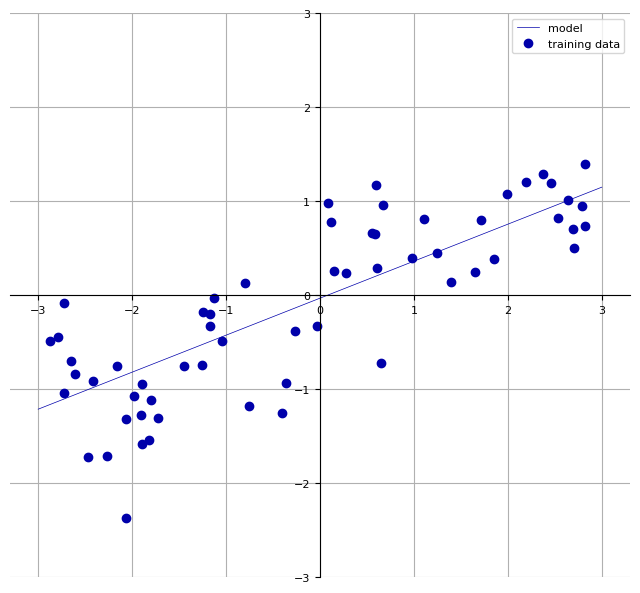

In [10]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions (red) and the true regression targets (blue), y, on the training set. 
    * MSE: Sum of the squared differences (residuals) between the predictions $\hat{y_i}$ and the true values $y_i$.
$$\mathcal{L}_{MSE} = \sum_{n=0}^{N} (y_n-\hat{y_n})^2 = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2$$ 

<img src="../images/02_least_squares.png" alt="ml" style="width: 550px;"/>

#### Solving ordinary least squares
* Convex optimization problem with unique closed-form solution (if you have more data points than model parameters w)
* It has no hyperparameters, thus model complexity cannot be controlled.
* It **very easily overfits**. What does that look like?
    * model parameters *w* become very large (steep incline/decline)
    * a small change in the input *x* results in a very different output *y* 

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

``` python
lr = LinearRegression().fit(X_train, y_train)
```

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.934563673645666


In [13]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Ridge regression
* Same formula as linear regression
* Adds a penalty term to the least squares sum:

$$\mathcal{L}_{Ridge} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} w_i^2$$ 

* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)

We can plot the weight values for differents levels of regularization. Move the slider to increase/decrease regularization. Increasing regularization decreases the values of the coefficients, but never to 0.

In [15]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X, y, random_state=0)

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

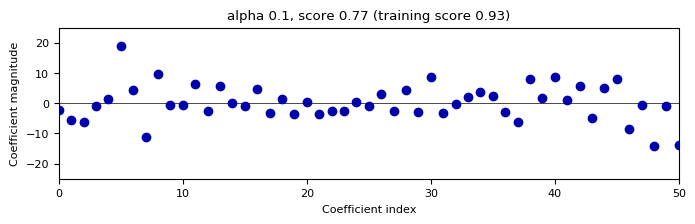

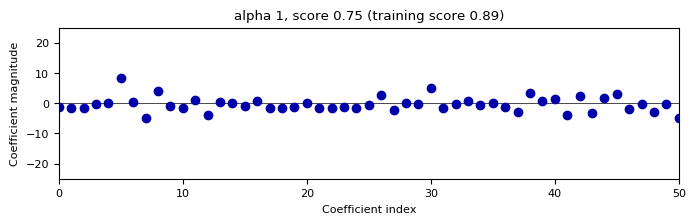

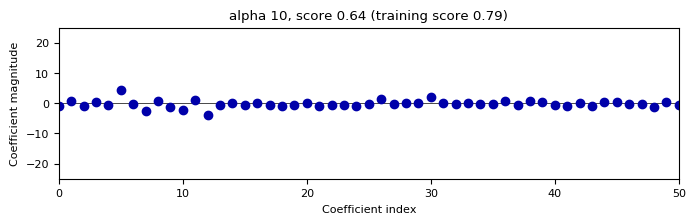

In [16]:
for alpha in [0.1, 1, 10]:
    plot_ridge(alpha)

#### Other ways to reduce overfitting:
* Add more training data: with enough training data, regularization becomes less important
    * Ridge and linear regression will have the same performance
* Use less features, remove unimportant ones or find a lower-dimensional embedding (e.g. PCA)
    * Less degrees of freedom
* Scaling the data may also help

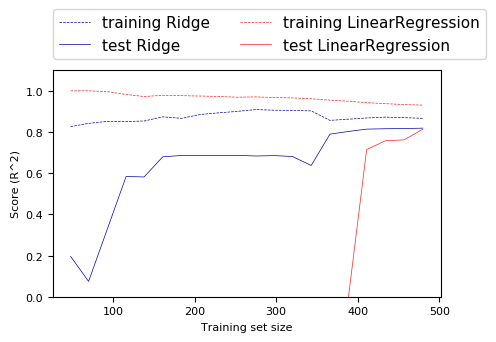

In [17]:
mglearn.plots.plot_ridge_n_samples()

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Another form of regularization
* Adds a penalty term to the least squares sum:
$$\mathcal{L}_{Lasso} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} |w_i|$$ 
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* Convex, but no longer strictly convex (and NOT differentiable). Weights can be optimized using (for instance) _coordinate descent_
* New parameter `max_iter`: the maximum number of coordinate descent iterations
    * Should be higher for small values of `alpha`

### Gradient Descent
* Start with a random set of p weights values $\mathbf{w}^0$
* Compute the derivative of the objective function $\mathcal{L}$ (e.g. $\mathcal{L_{Ridge}}$) and use it to find the slope (in p dimensions)
* Update all weights slightly (step size $\gamma$) in the direction of the downhill slope. For step s:
$$\mathbf{w}^{s+1} = \mathbf{w}^s-\gamma\nabla \mathcal{L}(\mathbf{w}^s)$$

* Repeat for `max_iter` iterations
* Visualization in 1 dimension (for 1 weight):
<img src="../images/01_gradient_descent.jpg" alt="ml" style="width: 500px;"/>

### Gradient Descent
In two dimensions:
<img src="../images/01_gradient_descent_2D.png" alt="ml" style="width: 700px;"/>


### Gradient Descent
* Intuition: walking downhill using only the slope you "feel" nearby
* In many dimensions (e.g. many model parameters) you nearly always find a good local minimum

<img src="../images/01_gradient_descent_hill.png" alt="ml" style="width: 600px;"/>

### Coordinate descent
- Variation of gradient descent, also applicable for non-differentiable loss functions
- Faster iterations, may converge more slowly
- In every iteration, optimizes a single coordinate $w_i$, using a coordinate selection rule (e.g. round robin)

<img src="../images/02_cd.png" alt="ml" style="width: 400px;"/>

- If $\mathcal{L}$ is differentiable (e.g. L2), the update rule is based on the partial derivative: $w_i^{s+1} = w_i^{s} − \gamma \frac{\partial \mathcal{L}}{\partial w_i}$
- If $\mathcal{L}$ is not differentiable but convex (e.g. L1), the [_subgradient_](https://www.cs.cmu.edu/~ggordon/10725-F12/slides/06-sg-method.pdf) can be computed. 
- For L1, the [resulting update rule](https://xavierbourretsicotte.github.io/lasso_derivation.html) includes the _soft thresholding operator S_: $w_i^{s+1} \cong S(f(w_i^{s}),\alpha)$
    - _S_ sets $w_i$'s to 0 when they are sufficiently small ('sufficiently' is defined by $\alpha$)


We can again analyse what happens to the weights. Increasing regularization under L1 leads to many coefficients becoming exactly 0.

In [18]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

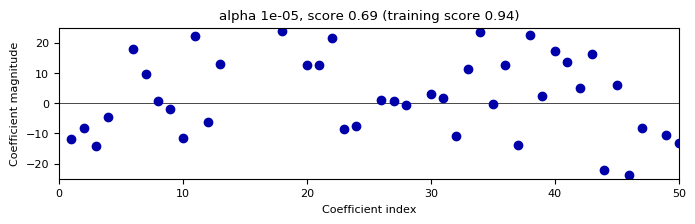

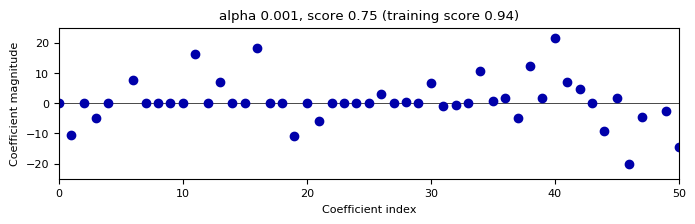

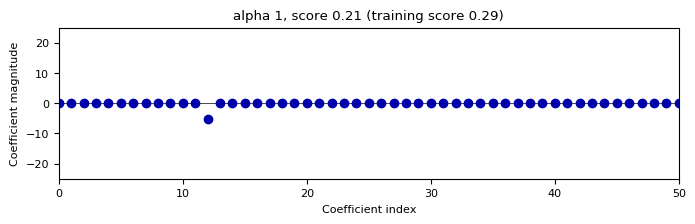

In [19]:
for alpha in [0.00001, 0.001, 1]:
    plot_lasso(alpha)

## Interpreting L1 and L2 loss
- L1 and L2 in function of the weights

<img src="../images/L12_1.png" alt="ml" style="width: 600px;"/>

Least Squares Loss + L1 or L2
    - Imagine f(x) is the least squares loss

<img src="../images/L12_2.png" alt="ml" style="width: 600px;"/>

In 2D (for 2 model weights $w_1$ and $w_2$)
- L1 loss ($\Sigma |w|$) for every {$w_1, w_2$} falls on the 'diamond'
- L2 ($\Sigma w^2$) for every {$w_1, w_2$} falls on the unit circle
- The least squared loss is a convex function in this space
- For L1, the loss is minimized (best model) if $w_1$ or $w_2$ is 0 (not so for L2)

<img src="../images/L12_3.png" alt="ml" style="width: 600px;"/>

#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

There are many algorithms for learning linear classification models, differing in:

* Loss function: evaluate how well the linear model fits the training data
* Regularization techniques

Most common techniques:

* Logistic regression: 
    * `sklearn.linear_model.LogisticRegression`
* Linear Support Vector Machine: 
    * `sklearn.svm.LinearSVC`


##### Logistic regression
* Transforms the classification problem into a regression problem
* Maps positive examples to value 1, others to value 0
* Fits a _logistic_ (or _sigmoid_) function to predict whether a given sample belongs to class 1.
    * $y$ value can be seen as a probability that the example is positive
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
![LogisticRegression image](../images/01_logistic.png)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

On 2-dimensional data: 
![LogisticRegression image](../images/02_logistic2d.png)

* The logistic function is chosen because it maps values (-Inf,Inf) to a probability [0,1]
* We add a new dimension for the dependent variable $\text{y}$ and fit the logistic function g(z) so that it separates the samples as good as possible. The positive (blue) points are mapped to 1 and the negative (red) points to 0.
* After fitting, the logistic function provides the probability that a new point is positive. If we need a binary prediction, we can threshold at 0.5.
* There are different ways to find the optimal parameters w that fit the training data best

##### Loss function: cross-entropy
* Since logistic regression returns a probability, we want to use that in the loss function rather than choosing an an arbitrary threshold (e.g. positive in y > 0.5).  
* We can measure the difference between the actual probabilities $p_i$ and the predicted probabilities $q_i$ is the cross-entropy $H(p,q)$:
$$ H(p,q) = - \sum_{i} p_i log(q_i) $$
* Note: This is also called _maximum likelihood_ estimation because instead of minimizing cross-entropy $H(p,q)$, you can maximize _log-likelihood_ $-H(p,q)$
* In binary classification, $i=0,1$ and $p_1=y$, $p_0=1-y$, $q_1=\hat{y}$, $q_0=1-\hat{y}$
* This yields _binary cross-entropy_:
$$ H(p,q) = - y log(\hat{y}) - (1-y) log(1-\hat{y})$$

##### Cross-entropy loss
* Loss function: the average of all cross-entropies in the sample (of $N$ data points):
$$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = \sum_{n=1}^{N} \big[ - y_n log(\hat{y_n}) - (1-y_n) log(1-\hat{y_n}) \big]$$
with $$\hat{y_n} = \frac{1}{1+e^{-\mathbf{w} \cdot \mathbf{x}}}$$
* This is called _logistic loss_, _log loss_ or _cross-entropy loss_
* We can (and should always) add a regularization term, either L1 or L2, e.g. for L2:
$$\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $$
    - Note: sklearn uses $C$ instead of $\alpha$, and it is the inverse (smaller values, more regularization)

Cross-entropy loss

<img src="../images/09_cross-entropy.png" alt="ml" style="width: 600px;"/>

##### Optimization methods (solvers)
* There are different ways to optimize cross-entropy loss.
* Gradient descent
    - The logistic function is differentiable, so we can use (stochastic) gradient descent
    - Stochastic Average Gradient descent (SAG): only updates gradient in one direction at each step
* Coordinate descent (default, called `liblinear` in sklearn)
    - Faster, may converge more slowly, may more easily get stuck in local minima
* Newton-Rhapson (or Newton Conjugate Gradient):
    - Finds optima by computing second derivatives (more expensive)
    - Works well if solution space is (near) convex
    - Also known as _iterative re-weighted least squares_
* Quasi-Newton methods
    - Approximate, faster to compute
    - E.g. Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)

##### Linear Support Vector Machine (intuition)
Find hyperplanes (dashed lines) maximizing the _margin_ between the classes  
<img src="../images/01_svm.png" alt="ml" style="width: 600px;"/>

##### Optimization and prediction
* Find a small number of data points to define the decision boundary (support vectors)
    * Each support vector has a weights (some are more important than others)
    * Hence, this is a non-parametric model
* Prediction is identical to (weighted) kNN:
    * Points closest to a red support vector are classified red, others blue
* The objective function penalizes every point predicted to be on the `wrong` side of its hyperplane
    * This is called _hinge loss_
* This results in a convex optimization problem solved using the _Langrange Multipliers_ method
    * Can also be solved using gradient descent
    * We'll get back to this later

Comparison

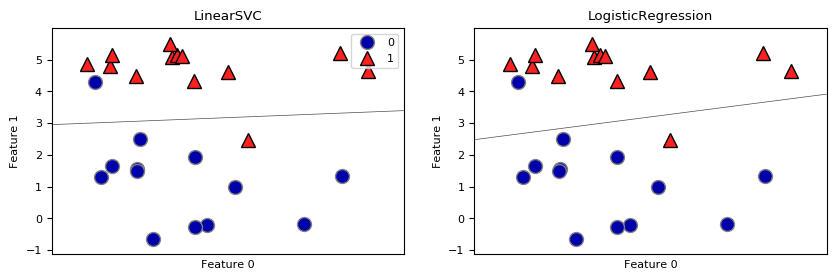

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0

SVM: High _C_ values (less regularization): fewer misclassifications but smaller margins.

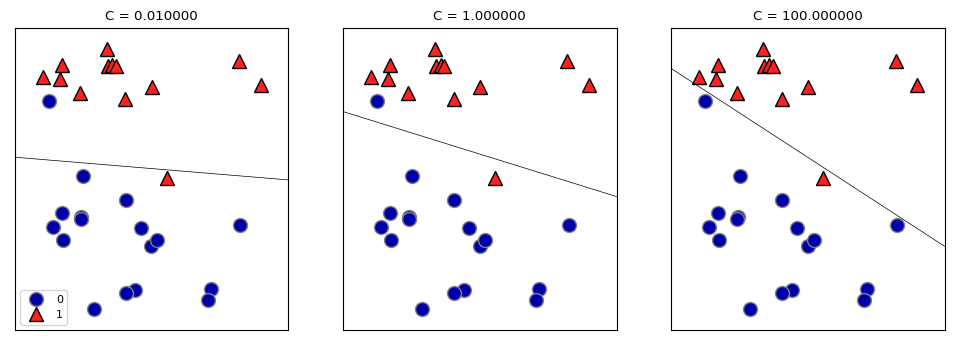

In [21]:
mglearn.plots.plot_linear_svc_regularization()

Model selection: Logistic regression  
`logreg = LogisticRegression(C=1).fit(X_train, y_train)`

Adjust the slider to see the effect of C and L1/L2 regularization

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

@interact
def plot_logreg(C=(0.01,100.0,0.1), penalty=['l1','l2']):
    r = LogisticRegression(C=C, penalty=penalty, solver='liblinear').fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_.T, 'o')
    ax.set_title("C {}, score {:.2f} (training score {:.2f})".format(C, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-15, 15)
    ax.set_xlim(0, 30);

interactive(children=(FloatSlider(value=49.910000000000004, description='C', min=0.01), Dropdown(description='…

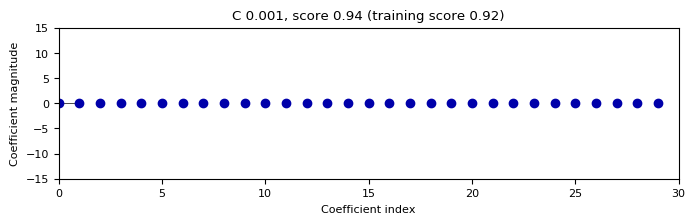

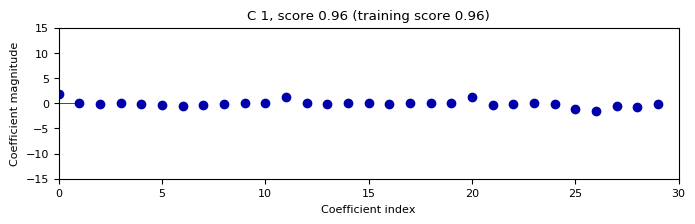

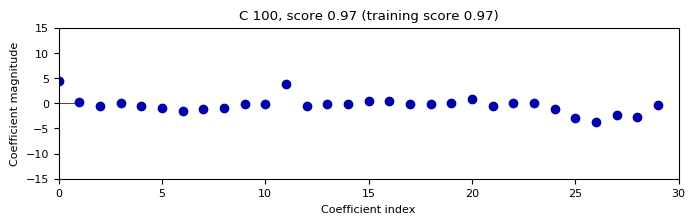

In [23]:
for C in [0.001, 1, 100]:
    plot_logreg(C, 'l2')

# k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset
    * Classification: predict the most frequent class of the k neighbors
    * Regression: predict the average of the values of the k neighbors
    * Both can be weighted by the distance to each neighbor
* Main hyper-parameters:
    * Number of neighbors (k). Acts as a regularizer.
    * Choice of distance function (e.g. Euclidean)
    * Weighting scheme (uniform, distance,...)
* Model:
    - Representation: Store training examples (e.g. in KD-tree)
    - Typical loss functions:
        * Classification: Accuracy (Zero-One Loss)
        * Regression: Root mean squared error
    - Optimization: None (no model parameters to tune)

## k-Nearest Neighbor Classification
k=1: look at nearest neighbor only: likely to overfit  
k>1: do a vote and return the majority (or a confidence value for each class)

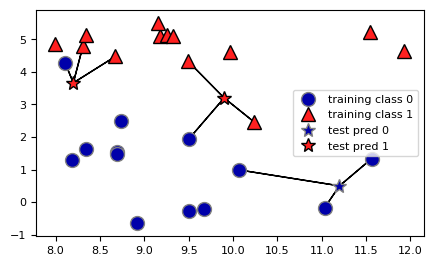

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

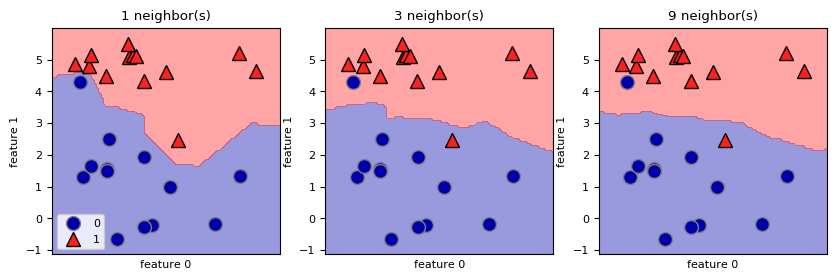

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

### Nearest Shrunken Centroid
* Nearest Centroid: Represents each class by the centroid of its members.
    * Parameteric model (while kNN is non-parametric)
* Regularization is possible with the `shrink_threshold` parameter
    * Shrinks (scales) each feature value by within-class variance of that feature
    * Soft thresholding: if feature value falls below threshold, it is set to 0
    * Effectively removes (noisy) features

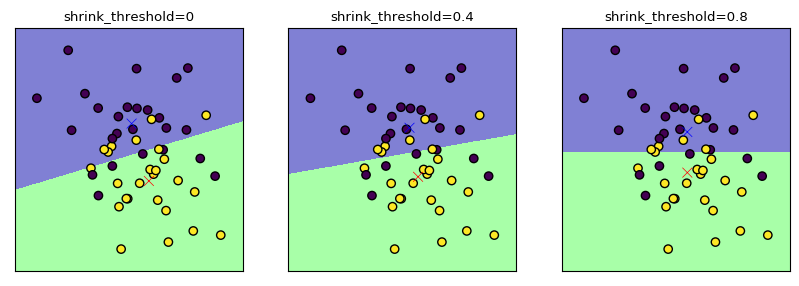

In [26]:
from sklearn.neighbors import NearestCentroid
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
thresholds = [0, 0.4, .8]
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)

for threshold, ax in zip(thresholds, axes):
    ax.set_title(f"shrink_threshold={threshold}")
    nc = NearestCentroid(shrink_threshold=threshold)
    nc.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    mglearn.tools.plot_2d_classification(nc, X, alpha=.5, ax=ax)
    ax.scatter(nc.centroids_[:, 0], nc.centroids_[:, 1], c=['b', 'r'], s=50, marker='x')
    ax.set_aspect("equal")

Note: Nearest Centroid suffers when the data is not 'convex'

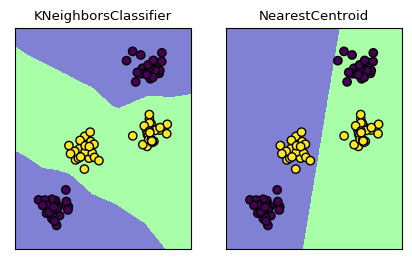

In [27]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)
nc = NearestCentroid().fit(X, y)

plt.figure
fig, axes = plt.subplots(1, 2)
for est, ax in [(knn, axes[0]), (nc, axes[1])]:
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    
    ax.set_title(est.__class__.__name__)
    mglearn.tools.plot_2d_classification(est, X, alpha=.5, ax=ax)
    ax.set_aspect("equal")

#### Scalability
With n = nr examples and p = nr features
* Nearest shrunken threshold
    * Fit: $O(n * p)$
    * Memory: $O(nrclasses * p)$
    * Predict: $O(nrclasses * p)$
* Nearest neighbors (naive)
    * Fit: $0$
    * Memory: $O(n * p)$
    * Predict: $O(n * p)$
* Nearest neighbors (with KD trees)
    * Fit: $O(p * n log n)$
    * Memory: $O(n * p)$
    * Predict: $O(k * log n)$


## k-Neighbors Regression
k=1: return the target value of the nearest neighbor (overfits easily)  
k>1: return the _mean_ of the target values of the _k_ nearest neighbors

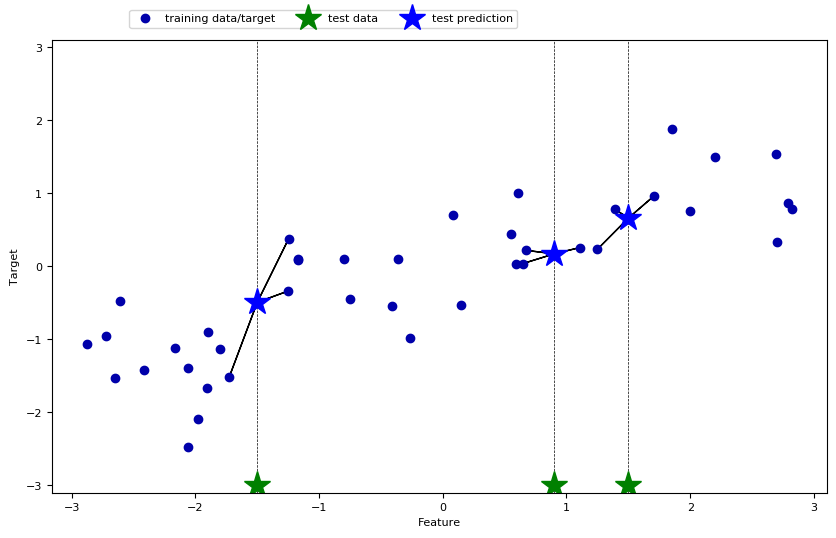

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

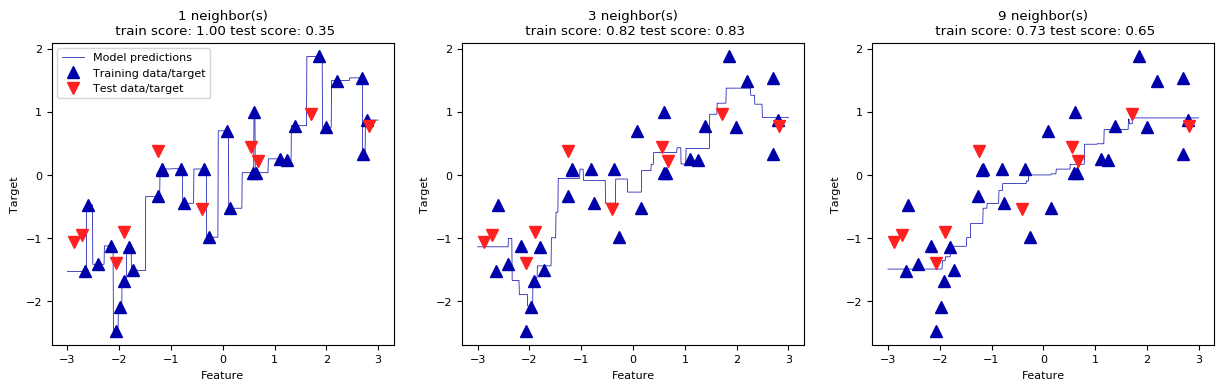

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# split the wave dataset into a training and a test set
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

## kNN: Strengths, weaknesses and parameters
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)
* Nearest centroid is a useful parametric alternative, but only if data is (near) linearly separable.